In [1]:
%matplotlib notebook

from os import listdir
from os.path import isfile, join
import json
import tensorflow
import numpy
import pandas
import matplotlib.pyplot as pyplot
import re
from pprint import pprint
import qgrid

# import seaborn
# sns.set_theme()

In [2]:
def load_files(path, dataset_name=None):
    runs = []
    if dataset_name is None:
        pattern = re.compile(r'(\w+)__(\w+)__(\w+)__(\w+)__(\d+).json'.format(dataset_name))
    else:
        pattern = re.compile(r'{}__(\w+)__(\w+)__(\w+)__(\d+).json'.format(dataset_name))
#     files = (f for f in listdir(path) if f.endswith('.json') and isfile(join(path, f)))
#     pattern = re.compile(r'(\w+)__(\w+)__(\w+)__(\w+)__(\d+).json')
    
    for file in listdir(path):
        filePath = join(path, file)
        match = pattern.match(file)
        if match is None or not isfile(filePath):
            continue
        
#         print(file)
        with open(filePath) as f:
            data = json.load(f)

        data = {**data, **data['config']} # flatten out config object
        del data['config']
#         pprint(data)
#         break
        
        i = data['iterations'] - 1
        history = data['history']
        data['val_accuracy'] = history['val_accuracy'][i]

        runs.append(data)
    
    df = pandas.DataFrame(runs)
#     df.set_index(['depth'], drop=False, inplace=True)
#     df.sort_index(inplace=True)
    return df

In [3]:
path = '/home/ctripp/project/dmp/data/exp/'

runs = load_files(path)


# datasetMap = loadLogfiles(path)
# datasetTuples = sorted(datasetMap.items())
# datasets = [d for b, d in datasetTuples]
# legend = [str(b) for b, d in datasetTuples]

# # legend = ['50 nodes', '100 nodes', '150 nodes', '200 nodes']

# # datasets = list(datasetMap.values())
# datasets = [datasets[0], datasets[4], datasets[9], datasets[14], datasets[18]]
# legend = [legend[0], legend[4], legend[8], legend[12], legend[18]]

# numColors = len(datasets)
# cm = pyplot.get_cmap('gist_rainbow')
# fig = pyplot.figure()
# ax = fig.add_subplot(111)
# colors = [cm(1.*i/numColors) for i in range(numColors)]
# ax.set_prop_cycle(color=colors)
# for i in range(numColors):
#     ax.plot(numpy.arange(10)*(i+1))

In [4]:
len(runs.index)

# sbatch -n1 -t18:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset': 'mnist','budgets':[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072], 'topologies' : [ 'rectangle' ]}

125277

In [6]:
agg_cols = ['dataset','topology', 'budget', 'depth']
datasets = ['mnist', '537_houses', 'wine_quality_white', 'sleep', 'connect_4', 'adult', '201_pol', 'nursery']
budgets = [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608]
topologies = ['rectangle', 'trapezoid', 'exponential', 'wide_first']
#topologies = ['trapezoid', 'exponential', 'wide_first']
depths = [2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 16, 18, 20]
num_runs = 30

agg = runs.groupby(agg_cols).size().reset_index(name='counts').sort_values(agg_cols)
missing = []
for dataset in datasets:
    dataset_match = agg[agg.dataset == dataset]
    for topology in topologies:
        topology_match = dataset_match[dataset_match.topology == topology]
        for budget in budgets:
            budget_match = topology_match[topology_match.budget == budget]
            for depth in depths:
                match = budget_match[budget_match.depth == depth]
                num_missing = num_runs
                if len(match.index) > 0:
                    num_missing -= match.iloc[0].counts
                if num_missing > 0:
#                     print('{} {} {} {} {}'.format(dataset, topology, budget, depth, missing))
                    command = '''sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{{'dataset' : '{}', 'budgets' : [ {} ], 'topologies' : [ '{}' ], 'depths' : [ {} ], 'reps' : {} }}"'''.format(dataset, budget, topology, depth, num_missing)
                    print(command)

# qgrid.show_grid(incomplete)

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 2 ], 'reps' : 2 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 3 ], 'reps' : 2 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 2048 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 2 ], 'reps' : 3 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 2048 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 3 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 2048 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 5 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 8388608 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 9 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 8388608 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 10 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 8388608 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 12 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 8388608 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 14 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'mnist', 'budgets' : [ 8388608 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 16 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srund

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'wine_quality_white', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 10 ], 'reps' : 10 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'wine_quality_white', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 12 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'wine_quality_white', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 14 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'wine_quality_white', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 16 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'wine_quality_white', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 18 ], 'reps' : 3

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 2 ], 'reps' : 13 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 3 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 4 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 5 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 7 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.asp

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 4194304 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 12 ], 'reps' : 2 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 4194304 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 14 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 4194304 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 16 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 4194304 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 18 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'sleep', 'budgets' : [ 4194304 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 20 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srund

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'connect_4', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 16 ], 'reps' : 18 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'connect_4', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 18 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'connect_4', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 20 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'connect_4', 'budgets' : [ 8388608 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 7 ], 'reps' : 13 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'connect_4', 'budgets' : [ 8388608 ], 'topologies' : [ 'wide_first' ], 'depths' : [ 8 ], 'reps' : 30 }"
sbatch -n1 -t2:00:0

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 2 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 3 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 4 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 5 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 1024 ], 'topologies' : [ 'rectangle' ], 'depths' : [ 7 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.expe

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 2 ], 'reps' : 3 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 3 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 4 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 5 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : '201_pol', 'budgets' : [ 8388608 ], 'topologies' : [ 'exponential' ], 'depths' : [ 7 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu

sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'nursery', 'budgets' : [ 1048576 ], 'topologies' : [ 'trapezoid' ], 'depths' : [ 20 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'nursery', 'budgets' : [ 2097152 ], 'topologies' : [ 'trapezoid' ], 'depths' : [ 2 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'nursery', 'budgets' : [ 2097152 ], 'topologies' : [ 'trapezoid' ], 'depths' : [ 3 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'nursery', 'budgets' : [ 2097152 ], 'topologies' : [ 'trapezoid' ], 'depths' : [ 4 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./srundmp.sh dmp.experiment.aspect_test.py "{'dataset' : 'nursery', 'budgets' : [ 2097152 ], 'topologies' : [ 'trapezoid' ], 'depths' : [ 5 ], 'reps' : 30 }"
sbatch -n1 -t2:00:00 --gres=gpu:1 ./sru

In [78]:

    
def plotEach(
    datasets,
    xlabel,
    ylabel,
    xFunction=lambda dataset:dataset['depth'], 
    yFunction=lambda dataset:dataset['depth'],
#     codes = ['rx--','g2--','b+--','k1--', 'cx--', 'm+--', 'y2--'],
    colors=colors,
    plotFunction=lambda x, y, code, color : pyplot.semilogy(x,y,code, color=color),
    legend=None,
    show=True):
    pyplot.figure()
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    for i, dataset in enumerate(datasets):
        plotFunction(xFunction(dataset), yFunction(dataset), 'x--', color=colors[i])
    if legend is not None:
        pyplot.legend(legend)
    if show:
        pyplot.show()
        
        

<IPython.core.display.Javascript object>


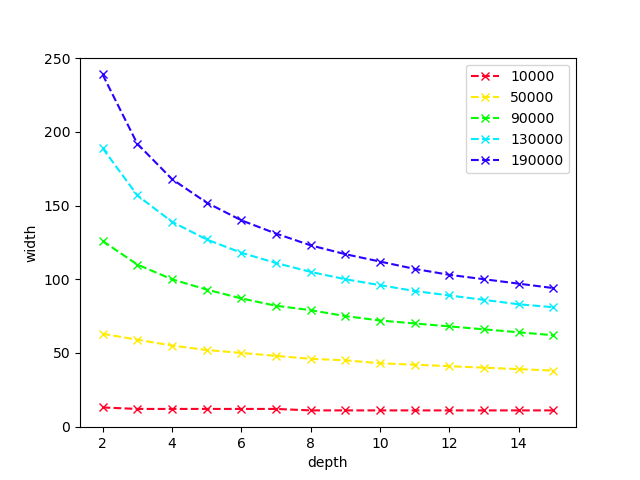

In [83]:
plotEach(datasets, 
         'depth', 
         'width',
         plotFunction=lambda x, y, code, color: pyplot.plot(x,y,code, color=color), 
         yFunction=lambda dataset: dataset['width'], 
         legend=legend)


<IPython.core.display.Javascript object>


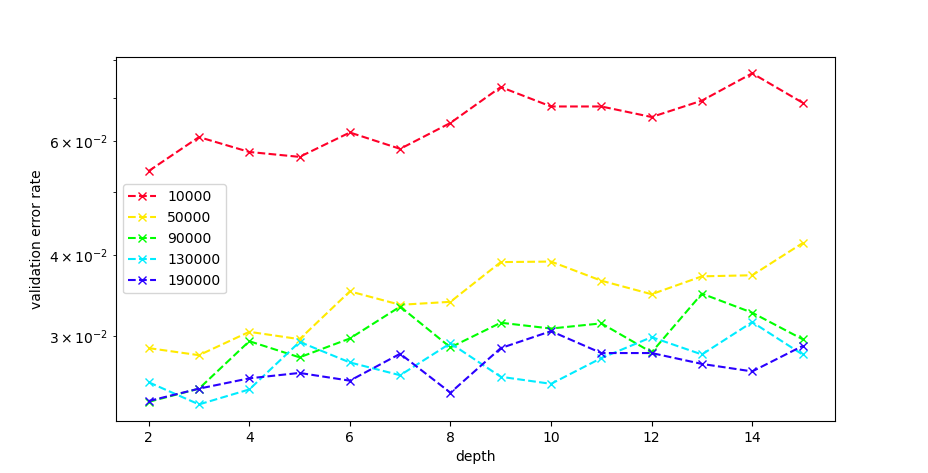

In [79]:
plotEach(datasets, 
         'depth', 
         'validation error rate',
         yFunction=lambda dataset: 1-dataset['val_accuracy'], 
         legend=legend)


<IPython.core.display.Javascript object>


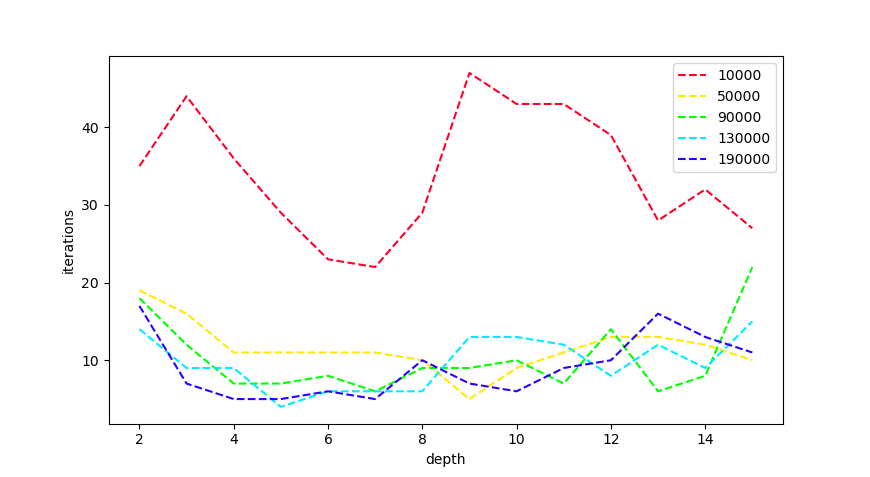

In [72]:
plotEach(datasets, 
         'depth',
         'iterations',
         plotFunction=lambda x, y, code, color: pyplot.plot(x,y,code, color=color), 
         yFunction=lambda dataset: dataset['iterations'], 
         legend=legend)


<IPython.core.display.Javascript object>


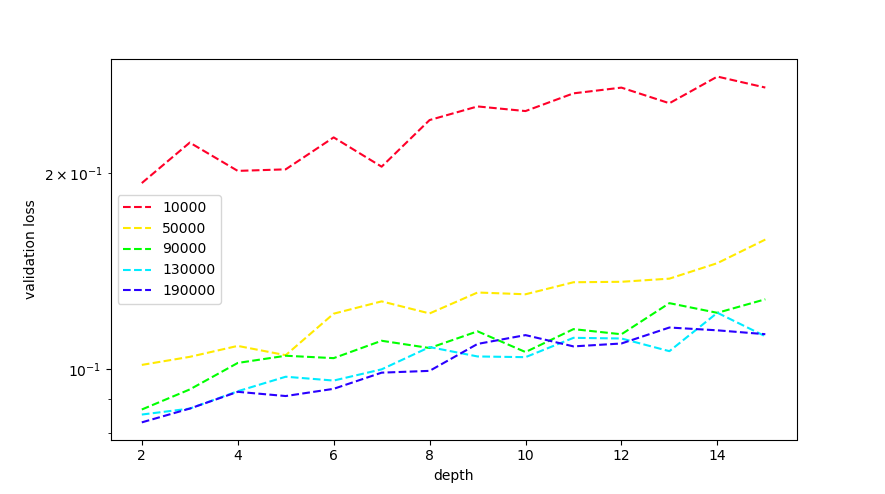

In [73]:
plotEach(datasets, 
         'depth',
         'validation loss',
         yFunction=lambda dataset: dataset['val_loss'], 
         legend=legend)


<IPython.core.display.Javascript object>


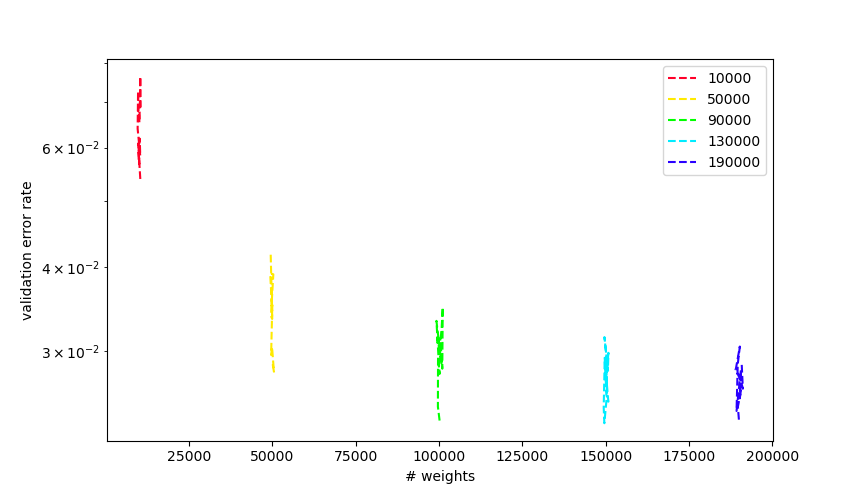

In [74]:
plotEach(datasets, 
         '# weights',
         'validation error rate',
         xFunction=lambda dataset: dataset['numWeights'],
         yFunction=lambda dataset: 1-dataset['val_accuracy'], 
         legend=legend)


<IPython.core.display.Javascript object>


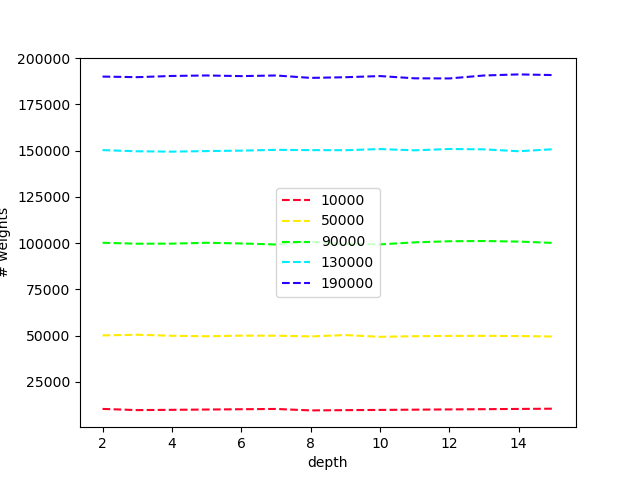

<IPython.core.display.Javascript object>


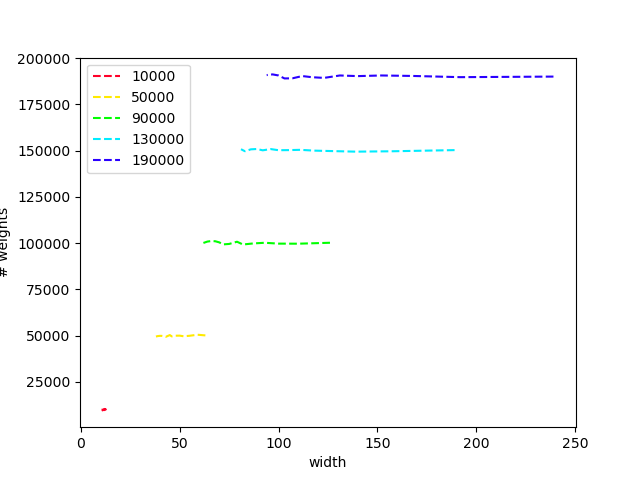

In [75]:
plotEach(datasets, 
         'depth',
         '# weights',
         plotFunction=lambda x, y, code, color: pyplot.plot(x,y,code, color=color),
         xFunction=lambda dataset: dataset['depth'],
         yFunction=lambda dataset: dataset['numWeights'], 
         legend=legend)

plotEach(datasets, 
         'width',
         '# weights',
         plotFunction=lambda x, y, code, color: pyplot.plot(x,y,code, color=color),
         xFunction=lambda dataset: dataset['width'],
         yFunction=lambda dataset: dataset['numWeights'], 
         legend=legend)

<IPython.core.display.Javascript object>


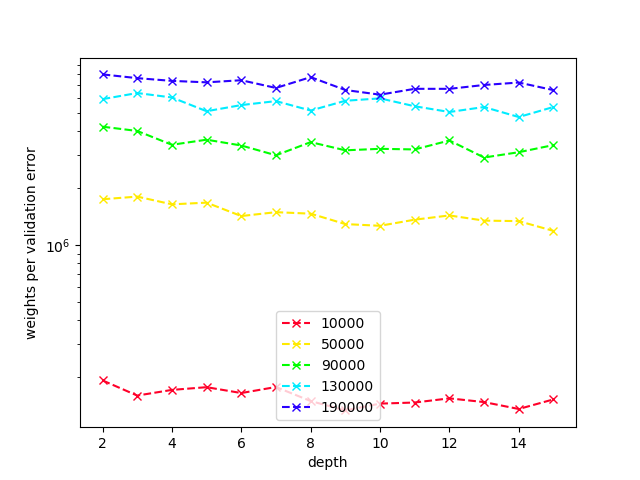

<IPython.core.display.Javascript object>


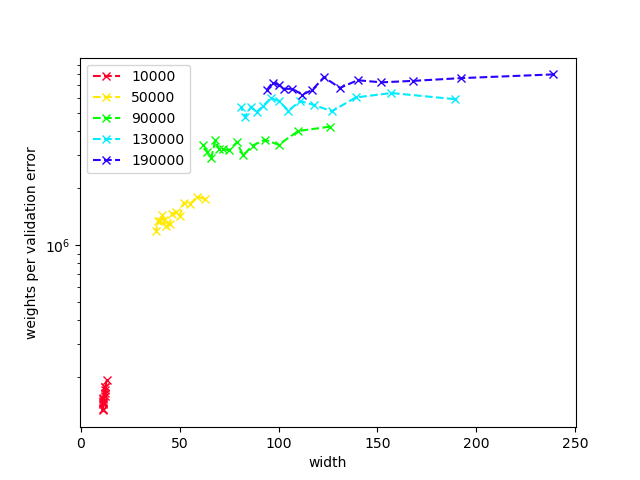

In [80]:
plotEach(datasets, 
         'depth',
         'weights per validation error',
         xFunction=lambda dataset: dataset['depth'],
         yFunction=lambda dataset: dataset['numWeights']/(1-dataset['val_accuracy']), 
         legend=legend)

plotEach(datasets, 
         'width',
         'weights per validation error',
#          plotFunction=lambda x, y, code: pyplot.plot(x,y,code), 
         xFunction=lambda dataset: dataset['width'],
         yFunction=lambda dataset: dataset['numWeights']/(1-dataset['val_accuracy']), 
         legend=legend)



In [77]:
b50['numWeights'] - (((b50['numInputs']+1) * b50['width']) + (b50['depth']-2).clip(lower=0)*(1+b50['width'])*b50['width']+ (b50['width'] + 1) * b50['numOutputs'])
b50['numWeights']

NameError: name 'b50' is not defined

<IPython.core.display.Javascript object>


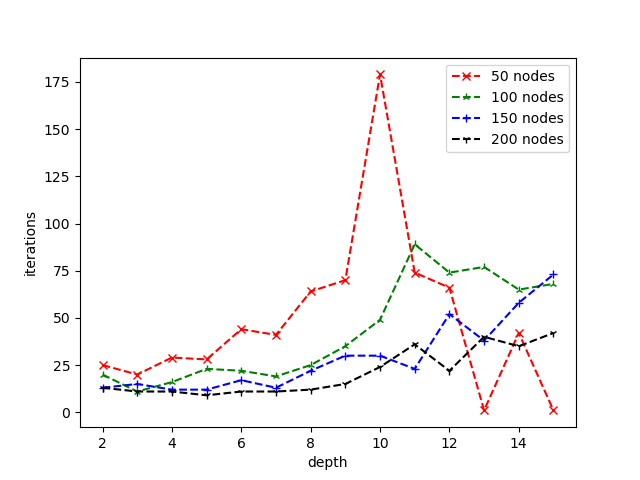